<a href="https://colab.research.google.com/github/Chanakarn06/multivariate-/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [9]:
import pandas as pd

In [10]:
BFI_data = pd.read_csv('/content/bfi.csv')

In [11]:
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


Factor Analysis
Assumptions :

ในข้อมูล multivariale ที่มีตัวแปร observe variable จำนวน n ตัว

มีตัวแปร Factor (Latent Variables) จำนวน k ตัวที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

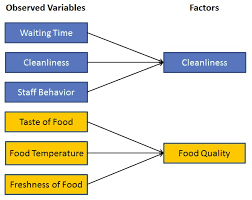

## **Assumptions ในการทำ Factor analysis**

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect ***multicollinearity***.

* There should not be ***homoscedasticity*** between the variables.

การทำ Factor Analysis

In [12]:
!pip install factor_analyzer
##แก้ Error ด้วยการ install
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt 
## เหมือนกับ from matplotlib import pyplot as plt

     |████████████████████████████████| 40kB 3.1MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=c5a803d126653af25dcdd793a86734c757a9631c846c2b2ee292ad06dcbb0339
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,...,o5,o6

In [13]:
BFI_data.shape

(2800, 29)

In [14]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [15]:
BFI_data_dropped = BFI_data_dropped.dropna()
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [16]:
BFI_data_dropped.shape

(2436, 25)

Bartlett's test

p value เข้าใกล้ 0 ดี

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(18170.966350869257, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

**Kaiser-Meyer-Olkin (KMO) Test**

ถ้าค่าKMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ factor Analysis


In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949222

In [19]:
kmo_model

0.8485397221949222

## factor analysis

### Import

In [20]:
from factor_analyzer import FactorAnalyzer

Define

In [21]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [22]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [23]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [24]:
ev,v = fa.get_eigenvalues()

### ใช้ eigen values

In [25]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

## scree plot

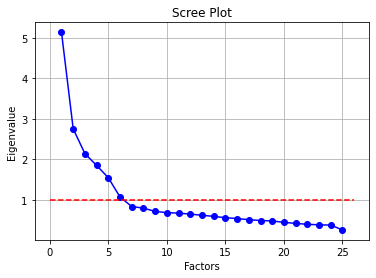

In [26]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [27]:
data_fa[:,:6]

array([[-0.89749664, -0.12809669, -1.22649079,  1.08665877,  0.424767  ,
         0.03981612],
       [ 0.33679355, -0.15018144, -0.04332282, -0.10339331,  0.29665652,
        -1.1101972 ],
       [-0.24521027,  0.8040996 ,  0.39343378, -0.30106518,  0.82703926,
        -0.29820222],
       ...,
       [ 0.38724621, -0.02183595,  1.196168  , -1.19357193,  0.79669499,
        -0.95295099],
       [-0.75695977,  0.94984749,  1.24363476, -1.1523021 ,  2.25341329,
        -1.02186669],
       [-2.35583965, -1.49829858,  0.49436984, -1.64734328,  0.94742314,
         0.43462508]])

## รัน Factor Analyzer อีกรอบ ด้วย paremeters จำนวน factor เท่ากับ 6

In [28]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [29]:
fa2.loadings_.shape

(25, 6)

#### Plot factor loadings

In [30]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

# matrix plot
confirmatory

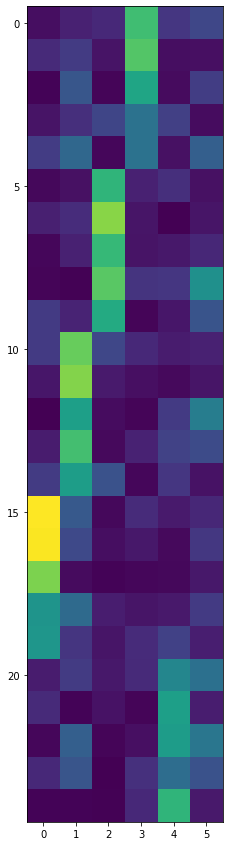

In [31]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

## กราฟแท่ง
Exploratory

In [32]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

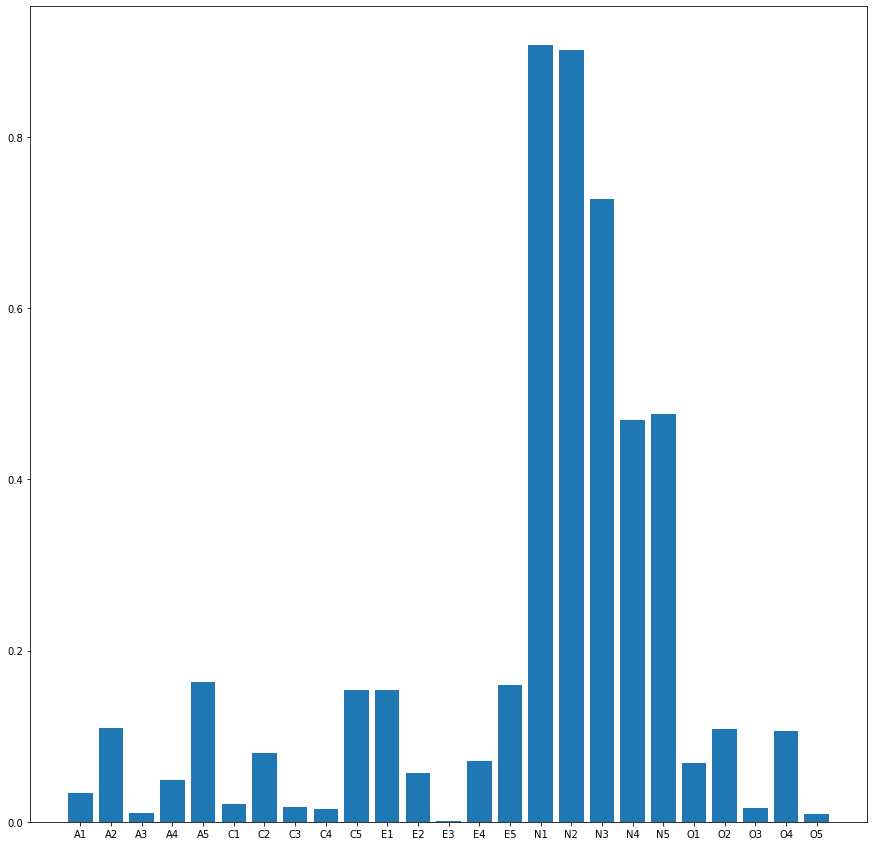

In [33]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

# Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 
https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

** Import ข้อมูล**

In [34]:
exam = pd.read_csv('/content/FIFA 2018 Statistics.csv')
exam

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [35]:
exam.shape

(128, 27)

In [36]:
exam_drop = exam.iloc[:,3:20]
exam_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


ขนาดของข้อมูล

In [37]:
exam_drop.shape

(128, 17)

***
**ทำการใช้ Bartlett’s test**

โดยถ้าค่า p value เข้าใกล้ 0 ถึงว่าดี

In [38]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(exam_drop)

chi_square_value, p_value

(1299.3697851171414, 2.7135801604659165e-189)

 output 
 ค่า P-value มีค่า 2.71 x 10^-189 ซึ่งมีค่าเข้าใกล้ 0 มาก

In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(exam_drop)

kmo_model

0.5594556344508267

**แปลผลจาก Output ได้ว่า**

**ค่า KMO จาก model มีค่าประมาณ 0.56 หรือประมาณได้ 0.6 แปลว่าเหมาะสมที่นำไปทำ Factor Analysis**

 Factor Analysis

In [40]:
# IMPORT
from factor_analyzer import FactorAnalyzer

In [41]:
# DEFINE กำหนดขนาดที่เลือก
ex_fa = FactorAnalyzer(n_factors=10)

In [42]:
# Fit-transform
data_ex_fa = ex_fa.fit_transform(exam_drop)

In [43]:
# ตรวจสอบ ขนาดข้อมูล
data_ex_fa.shape

(128, 10)

ลด dimension โดยการใช้ eigen values

In [44]:
ev,v = ex_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

scree plot

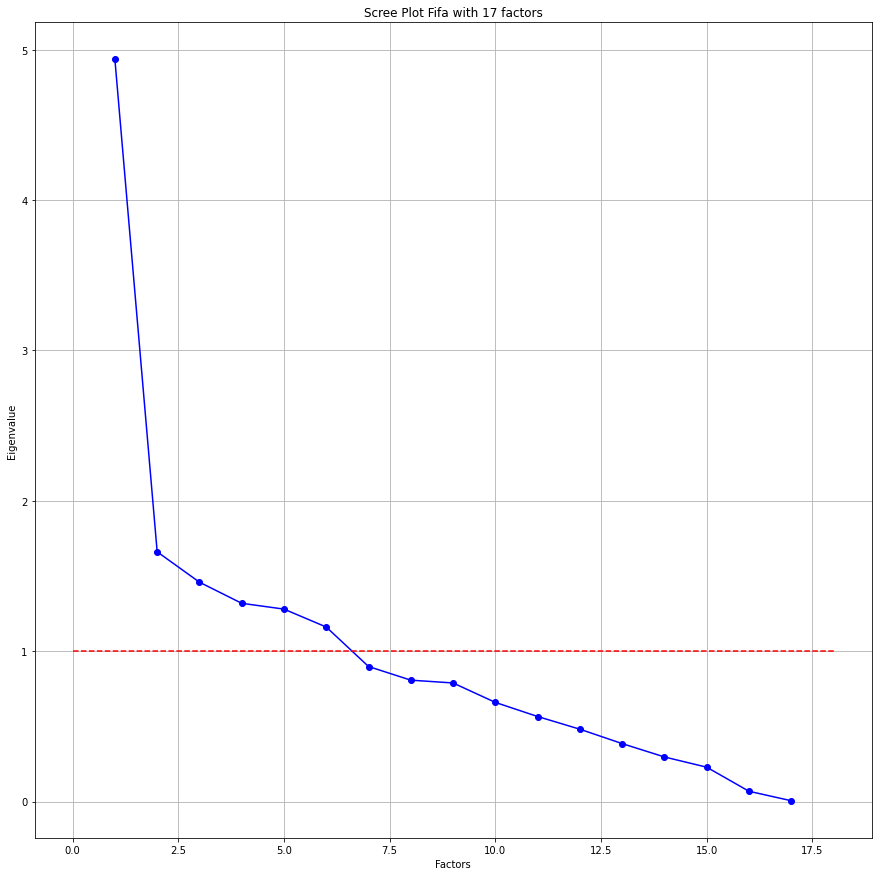

In [45]:
plt.plot(range(1,exam_drop.shape[1]+1),ev,'bo-')
plt.plot([0,exam_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot Fifa with 17 factors')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

มีตัวที่มีค่า factor มากกว่า 1 อยู่ 6 ตัว*


In [46]:
data_ex_fa[:,:6]

array([[-1.14061135e+00,  1.05033795e+00,  2.79854548e+00,
         3.57574909e-01, -5.95142053e-02, -7.48334422e-02],
       [ 5.33831275e-01, -1.78150172e-01, -1.10088640e+00,
         1.81435399e-02, -8.36944122e-01, -7.31531737e-01],
       [-7.29379757e-01,  3.96402610e-01, -7.02153336e-01,
        -2.77221856e-01,  1.34345185e-01, -5.61356581e-01],
       [ 7.08580262e-01,  3.36178776e-01, -3.31529296e-01,
        -2.60518621e-01, -1.38667316e+00,  1.34916247e-01],
       [ 3.25530747e-01, -3.71841643e-01, -4.14431500e-01,
         3.27492951e-01,  2.50367514e-01,  2.57255843e-01],
       [-1.34130201e+00, -5.34561966e-01,  2.52429425e-01,
        -5.22236067e-01,  1.05852606e+00, -1.07428692e+00],
       [-5.46867933e-01, -4.92844211e-01,  9.46711066e-01,
        -3.59877177e-01, -1.85390874e-01, -3.25465510e-01],
       [ 1.67488724e+00, -4.32704619e-01,  7.61605550e-01,
        -3.70473470e-01, -8.35201657e-01, -5.88310421e-01],
       [ 2.62530202e-01, -3.24159238e-01,  6.589

 Run Factor Analyzer อีกครั้ง ด้วย paremeters จำนวน factor เท่ากับ 6

In [47]:
from factor_analyzer import FactorAnalyzer
ex_fa2 = FactorAnalyzer(n_factors=6)
data_ex_fa2 = ex_fa2.fit_transform(exam_drop)

In [48]:
ex_fa2.loadings_.shape

# เช็คขนาดของ ex_fa2 

(17, 6)

In [ ]:
***
**จากนั้นทำการ Plot factor loadings**

In [49]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

In [ ]:
Matrix plot



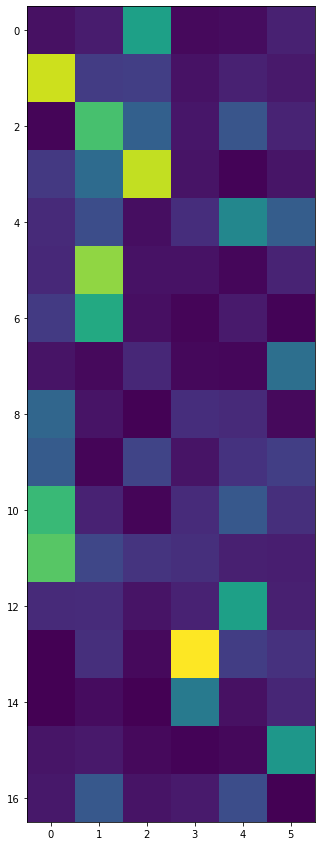

In [50]:
## Matrix plot
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(ex_fa2.loadings_))

กราฟนี้มีความชัดเจนอยู่ 4 จุดคือ [1,0] , [5,1] , [3,2] และ [13,3]

(Exploratory Factors Analysis หรือ การวิเคราะห์องค์ประกอบเชิงสำรวจ)

In [51]:
exam_drop.columns
## ตรวจสอบชื่อทั้งหมด 17 Factors

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

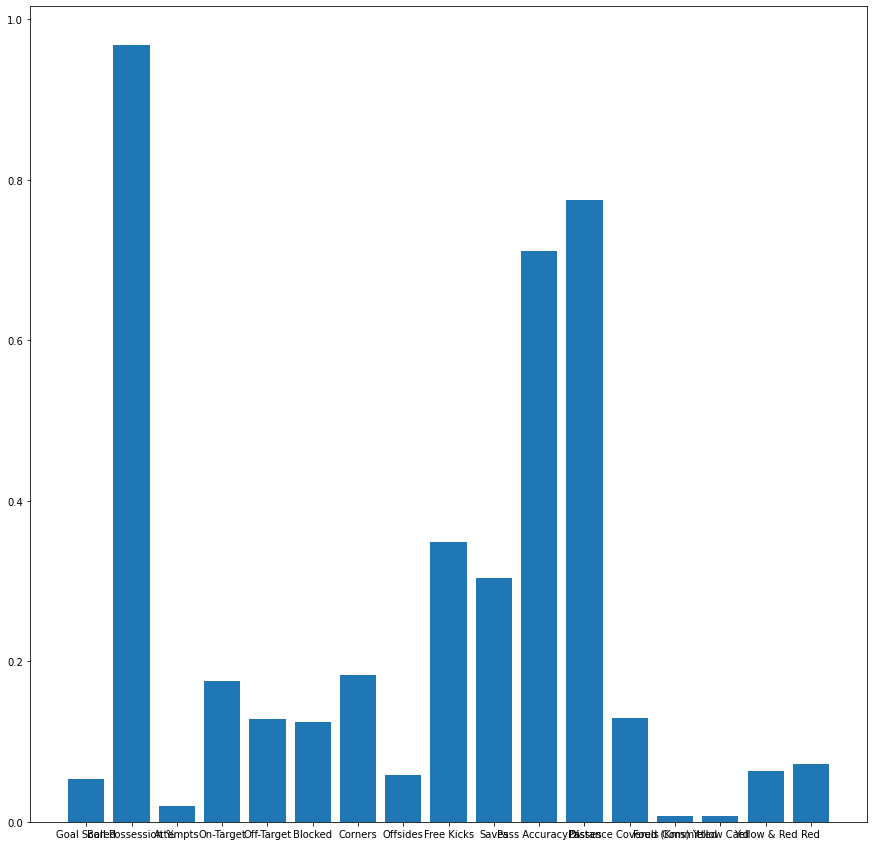

In [52]:
plt.bar(range(17),np.absolute(ex_fa2.loadings_[:,0]),tick_label=exam_drop.columns)



ในข้อมูล มีตัวแปร Factors จำนวน 6 ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้และสามารถวิเคราะห์องค์ประกอบเชิงสำรวจ  และ วิเคราะห์องค์ประกอบเชิงยืนยันได้
